## <span style="color:#4375c7">DAI</span>
***
*Course materials are for educational purposes only. Nothing contained herein should be considered investment advice or an opinion regarding the suitability of any security. For more information about this course, please contact us.*
***


## Unsupervised learning

Unsupervised learning includes methods and algorithms for finding patterns in unlabeled data sets. The two main tasks of unsupervised learning are to find the best representation of the data, known as unsupervised transformations, and to divide the data into different groups, known as clustering. The result of the learning algorithms is unknown, there is no supervisor training the algorithm. Unsupervised learning can be used to gain a deeper understanding of the data or to split the data, and is also useful for preprocessing data for supervised algorithms.

### Session contents:
1. **[Notebook set up](#setup)**
2. **[Cluster analysis](#ClustAna)**
    - [k-means clustering](#kmeans)
    - [Hierachical clustering](#Hclustering)
    - [Dendrogram](#Dendrogram)
    - [Number of clusters]("Ncluster")

3. **[Hands on]("#handson")**
4. **[Session takeaways](#takeaways)**

***

## 1. Notebook set up  <a name="setup"></a> 
As a first step, import the Python libraries Pandas, NumPy, Matplotlib, mglearn and modules from SciPy, sklearn and IPython. In case you cannot import any library: open a new terminal and install the module via pip: `pip install mglearn`.
The examples using the library mglearn are based on Müller et al. [1].



In [1]:
#!pip install -r https://raw.githubusercontent.com/firrm/DAI/main/requirements.txt #ensure that the required packages are installed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import mglearn
from IPython import display
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, ward, average
from sklearn.cluster import AgglomerativeClustering

## 2. Cluster analysis <a id='ClustAna'></a>

**Cluster analysis** or **clustering** describes methods that divide a set of objects into many subsets, called **clusters**. Objects in a cluster should be as similar as possible to each other, while objects in different clusters should be distinctly different from each other. Given a set of objects $ I = \{I_1, \dots, I_N\}$ and some associated features $x = \{x_1, \dots, x_p\}$, we can perform a cluster analysis. We can sum up the features of the objects in a **feature matrix** 

$$X = \begin{bmatrix} x_{1,1} & \dots & x_{1,p} \\ \vdots & & \vdots \\ x_{N,1} & \dots & x_{N,p} \end{bmatrix}.$$

Some clustering methods use this feature matrix directly in the clustering process, while others use **similarity** or **distance measures** of the feature values.

For all methods, the following holds: One object should be assigned to one of $n$ clusters. A calculated set of clusters is called **partition**. For such a partition $\Gamma = \{C_1, C_2, \dots, C_n\}$ of a set of objects $I$ holds:

\begin{align}
\bigcup^n_{l=1} C_l = I, \quad C_l \; \cap \; C_r \ne \emptyset,\quad l \ne r .
\end{align}

Different methods can be used to generate partitions of clusters.

###  K-means<a id='kmeans'></a>


**K-means** is one of the most widely used clustering algorithms. This algorithm aims to find the cluster centers that are representative of certain "regions" in the data. The number of clusters must be given to the algorithm. The algorithm can be described as follows


1. Initialize random data points as cluster centers
2. Assign every data point to the nearest cluster by calculating the distance to the different cluster centers
3. Set the cluster centers as the mean of the assigned data points
4. Repeat step 2) and 3) until the assignment of the data points to the clusters does not change anymore. 

The following plot visualizes the k-means clustering process.

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

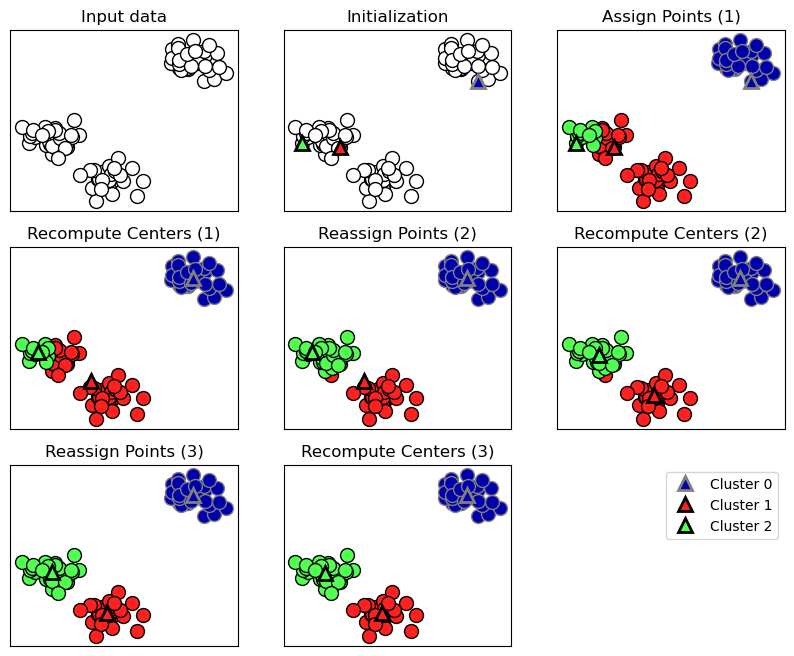

In [3]:
mglearn.plots.plot_kmeans_algorithm()


**K-means** minimizes the within-cluster variances (the squared Euclidean distances). This results in the partitioning of the data space into **Voroni cells**. Each Voroni cell contains one cluster. The following example shows the boundaries of the clusters. Each Voroni cell is marked with a different color.



C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


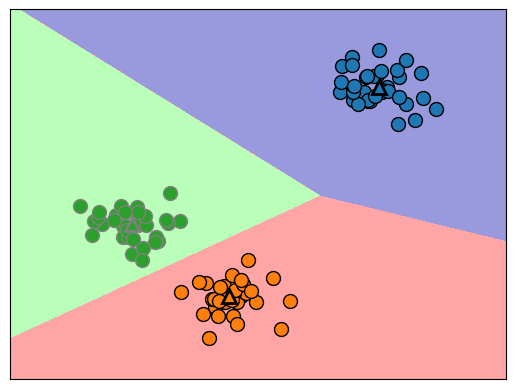

In [2]:
mglearn.plots.plot_kmeans_boundaries()

We can use **k-means** with the scikit-learn package. We use the same synthetic data as in the previous example and set the number of clusters to 3 (the default by n_clusters is 8).

In [4]:
X, _ = make_blobs(random_state=1)

# Clustering model and fit:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

print("First 5 datapoints of X:")
print(X[:5])
print("Cluster-Assingment:\n{}".format(kmeans.labels_))

First 5 datapoints of X:
[[ -0.79415228   2.10495117]
 [ -9.15155186  -4.81286449]
 [-11.44182631  -4.45781441]
 [ -9.76761777  -3.19133737]
 [ -4.53655648  -8.40186288]]
Cluster-Assingment:
[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


We receive the same partition as before:

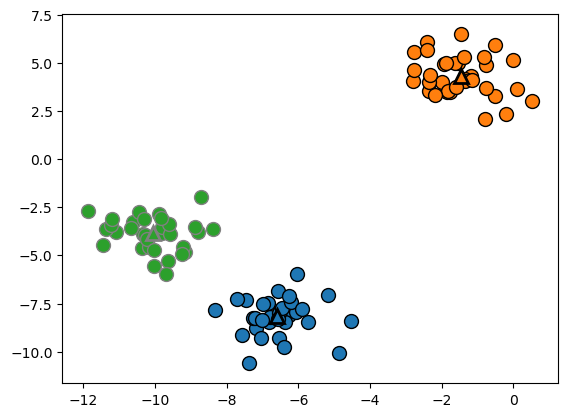

In [5]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0],
                         kmeans.cluster_centers_[:, 1], [0, 1, 2],
                         markers='^',
                         markeredgewidth=2)
plt.show()

New data points can be assigned to the clusters using the **.predict()** method.

If we choose a different cluster threshold, we get different results:

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


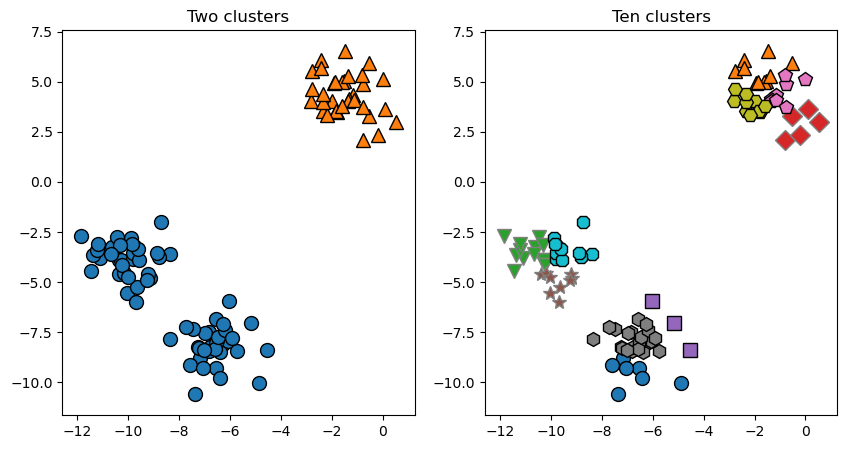

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
# two clusters:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])
axes[0].set_title("Two clusters")
# five clusters:
kmeans = KMeans(n_clusters=10)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])
axes[1].set_title("Ten clusters")
plt.show()

Even if we know the exact number of clusters, **k-means** performs poorly in some cases. For example, if the clusters have complex shapes, or if the data points cannot be easily separated, **k-means** cannot find a useful solution.

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


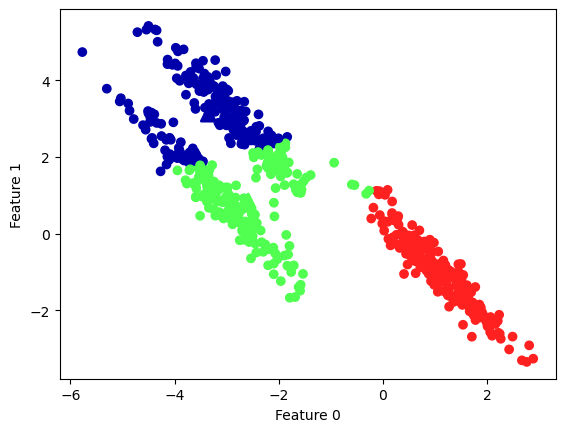

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


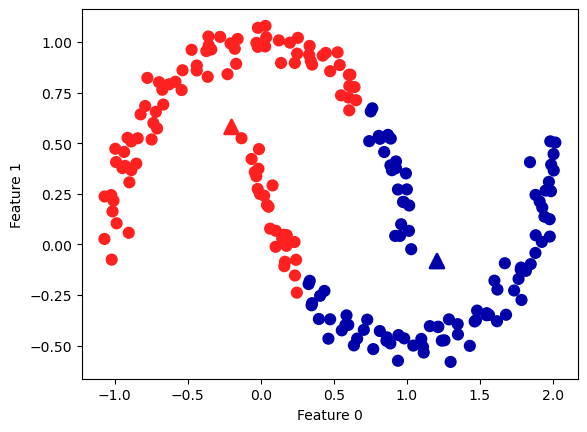

In [8]:
# Generate random data points:
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)
# transform the data:
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)
# Cluster the data in three clusters:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)
# plotting:
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm3)
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            marker='^',
            c=[0, 1, 2],
            s=100,
            linewidth=2,
            cmap=mglearn.cm3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

# generate random data in moon shape:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
# cluster data:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)
# plotting
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm2, s=60)
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            marker='^',
            c=[mglearn.cm2(0), mglearn.cm2(1)],
            s=100,
            linewidth=2)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

###  Hierarchical clustering <a id='Hclustering'></a>
**Hierarchical clustering** generates a partition of a given set of objects using an iterative hierarchical structure. Hierarchical clustering methods can be divided into two groups. First, the **divisive clustering**, a top-down approach, which starts with all objects forming a single cluster and then divides this cluster iteratively and hierarchically into smaller clusters until each object forms a single cluster. Second, the **agglomerative clustering**, a bottom-up approach, which startis by declaring each object a separate cluster, then merging the two most similar clusters until all objects form one large cluster. Each iterative step of hierarchical clustering creates a new partition. Thus, the clustering process generates for $p$ objects $p-1$ different partitions. The following example from Müller et al. [1] shows the iterative process of **agglomerative clustering**.

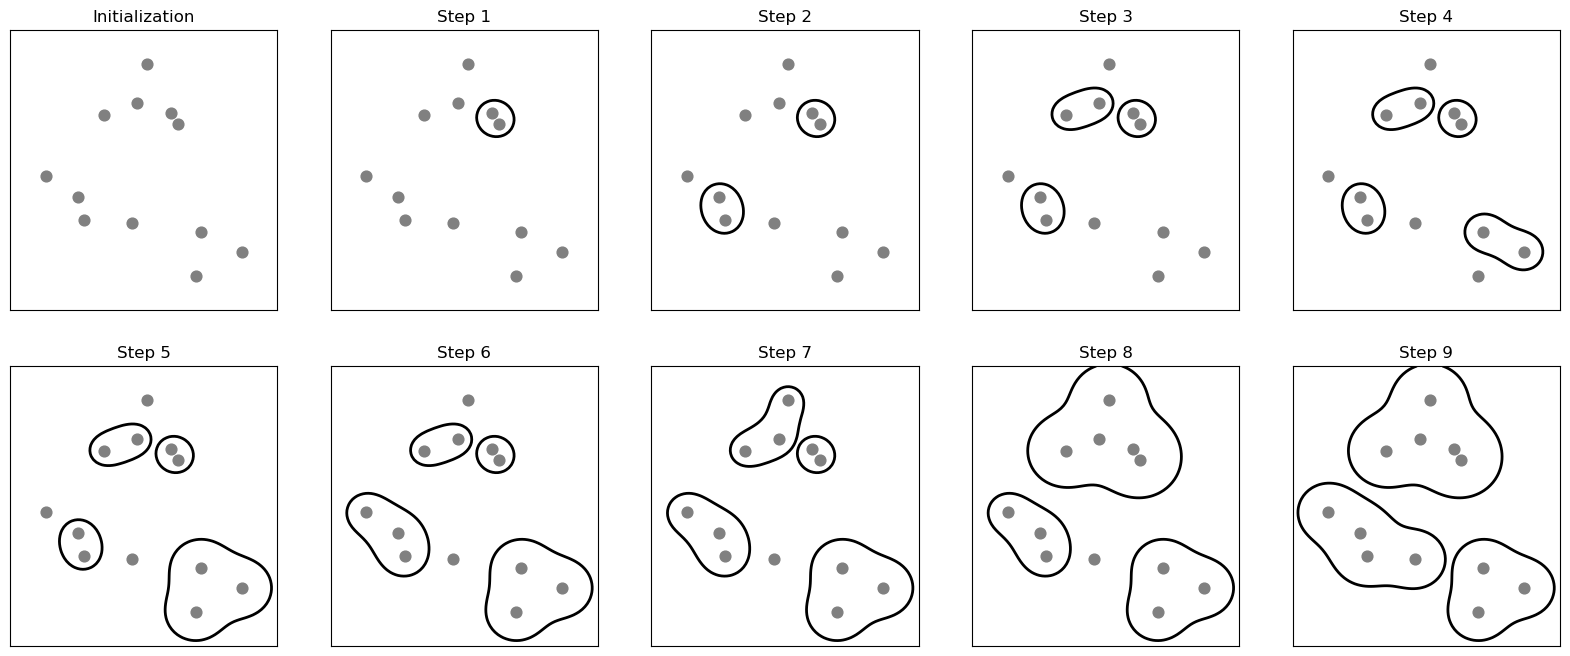

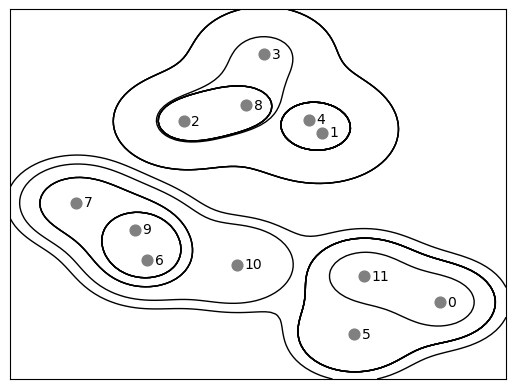

In [9]:
mglearn.plots.plot_agglomerative_algorithm()
plt.show()
mglearn.plots.plot_agglomerative()
plt.show()

The **homogeneity** of the clusters is measured by an index $h$. For small values of $h$, we get more homogeneity in each cluster, but also smaller clusters. Using this index has the advantage that it is not necessary to choose an explicit number of clusters or an explicit value of $h$ before implementing the clustering algorithm. $h$ can also be thought of as the cluster distance.

###  Dendrogram <a id='Dendrogram'></a>
All the different partitions can be visualized by a **dendrogram**. The number of clusters can be selected by cutting the dendrogram at a certain homogeneity index level. Let's visualize this with a short example of 15 data points in a two dimensional space.

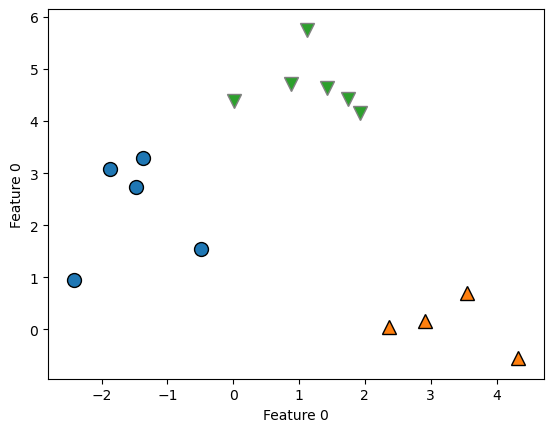

In [10]:
from sklearn.cluster import AgglomerativeClustering

X, y = make_blobs(random_state=0, n_samples=15)
agg = AgglomerativeClustering(n_clusters=3, linkage="ward")
assignment = agg.fit_predict(X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignment)
plt.xlabel("Feature 0")
plt.ylabel("Feature 0")
plt.show()

This dataset can be transformed into the following dendrogram:

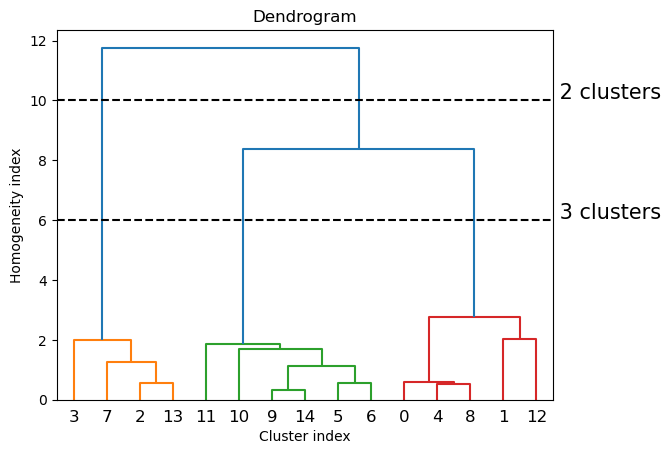

In [12]:
X, y = make_blobs(random_state=0, n_samples=15)
linkage_array = ward(X)
dendrogram(linkage_array)
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [10, 10], '--', c='k')
ax.plot(bounds, [6, 6], '--', c='k')
ax.text(bounds[1], 10.25, ' 2 clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 6.25, ' 3 clusters', va='center', fontdict={'size': 15})
plt.xlabel("Cluster index")
plt.ylabel("Homogeneity index")
plt.title("Dendrogram")

plt.show()


The length of each branch of the dendrogram shows the distance between the homogeneity indices of the merged clusters. 
The longest branches are those marked by the dotted line "3 clusters". Merging these three clusters into two clusters would result in merging data points that are far apart. Therefore, we should choose a number of clusters greater than two. 

###  Distance measures <a id='Distance measures '></a>
The similarity of two objects or classes can be measured by distance measures. Calculating the distance between objects always leads to a reduction of information. The most common distance measures for quantitative data are $L_p$ distance measures, such as the **city-block-distance** ($L_1$ distance):

\begin{align}
d_1(x_n,x_m) = \sum^p_{i=1} |x_{ni} - x_{mi}|
\end{align}

for objects $\{ x_{n1}, \dots, x_{np} \}$ and $\{ x_{m1}, \dots, x_{mp} \}$, or the **Euclidean distance**($L_2$ distance):

\begin{align}
d_2(x_n,x_m) = (\sum^p_{i=1} (x_{ni} - x_{mi})^2)^{1/2}
\end{align}

As an alternative, the **correlation** between two objects $\rho:=\frac{COV(x_n,x_m)}{\sigma_{x_n} \sigma_{x_m}}$ can be used as a distance measure:

\begin{align}
d_\rho(x_n,x_m) = 1- \rho(x_{n}, x_{m})
\end{align}

###  Linkage<a id='Linkage '></a>
Each cluster describes a set of objects or data points. We now know how to calculate the distance between two objects, but how do we define the distance between two clusters?

This can be done using the following linkage-methods.

The **single-linkage** (Nearest Point Algorithm) for two clusters $C_n,Cm$ is defined as

\begin{align}
 h = \delta(C_n,C_m) = \min_{x_n \in C_n, x_m \in C_m} d(x_n,x_m)
\end{align}

The **single-linkage** calculates the smallest distance between all objects of the two clusters. This is done for all combinations of clusters. In an agglomerative clustering step, the two clusters with the smallest total distance are then merged. 


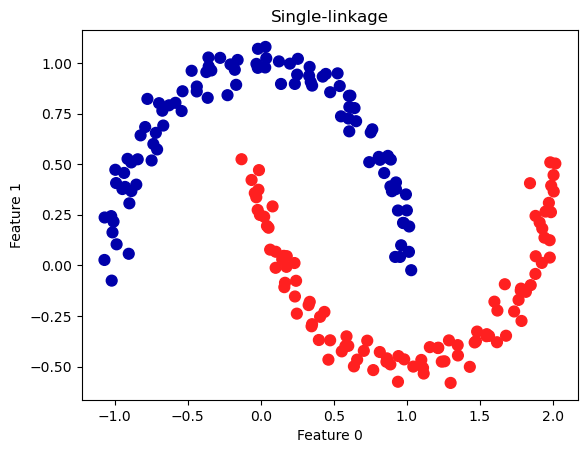

In [13]:
# generate random data in moon shape:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
# cluster data:
kmeans = AgglomerativeClustering(n_clusters=3, linkage="single")
kmeans.fit(X)
y_pred = kmeans.fit_predict(X)
# plotting
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.title("Single-linkage")
plt.show()

The **complete-linkage** (Farthest Point Algorithm) for two clusters $C_n,Cm$ is defined as

\begin{align}
 h = \delta(C_n,C_m) = \max_{x_n \in C_n, x_m \in C_m} d(x_n,x_m)
\end{align}




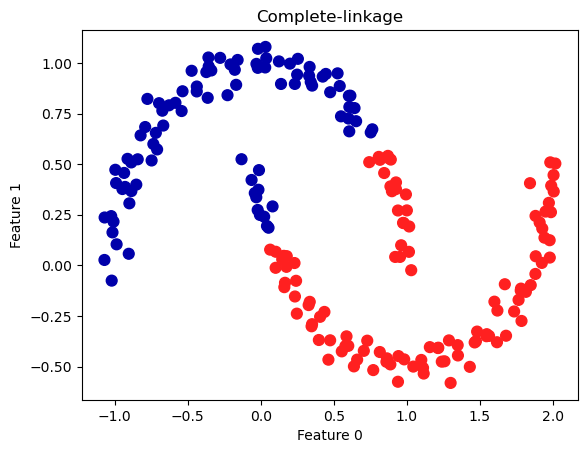

In [14]:
# generate random data in moon shape:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
# cluster data:
kmeans = AgglomerativeClustering(n_clusters=3, linkage="complete")
kmeans.fit(X)
y_pred = kmeans.fit_predict(X)
# plotting
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm2, s=60)

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.title("Complete-linkage")
plt.show()

The **average-linkage**  for two clusters $C_n,Cm$ is defined as

\begin{align}
 h = \delta(C_n,C_m) = \frac{1}{N_n N_M} \sum_{x_n \in C_n} \sum_{x_m \in C_m} d(x_n,x_m)
\end{align}

with $N_n, N_m$ number ob objects in clusters $C_n,C_m$

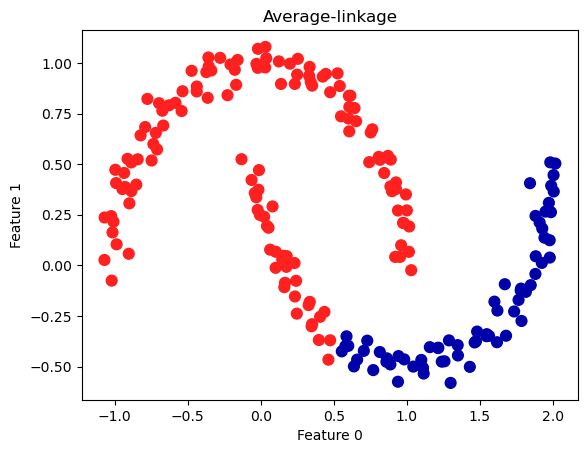

In [15]:
# generate random data in moon shape:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
# cluster data:
kmeans = AgglomerativeClustering(n_clusters=3, linkage="average")
kmeans.fit(X)
y_pred = kmeans.fit_predict(X)
# plotting
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm2, s=60)
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
#marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidth=2)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.title("Average-linkage")
plt.show()

The **ward-linkage** (minimum variance method) for two clusters is defined as

\begin{align}
h =  \delta(C_n,C_m) = min \frac{N_n N_m}{N_n+N_m} d(\overline{x_n},\overline{x_m})^2
\end{align}

with $\overline{x_n},\overline{x_m}$ centers of the clusters $C_n,C_m$. 

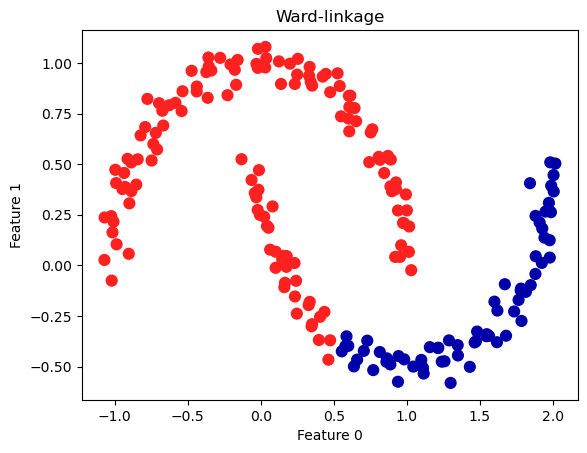

In [16]:
# generate random data in moon shape:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
# cluster data:
kmeans = AgglomerativeClustering(n_clusters=3, linkage="ward")
kmeans.fit(X)
y_pred = kmeans.fit_predict(X)
# plotting
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm2, s=60)
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
#marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidth=2)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.title("Ward-linkage")
plt.show()

###  Number of clusters <a id='Nclusters'></a>
How do we find the optimal number of clusters? The basic idea is that we want to find the natural partition of a given set of objects. In practice, the optimal number of clusters depends on the specific task and should be chosen carefully. There are many different methods to find the best partition of a data set (see Fahrmeir et al.[2]), and the method should be chosen depending on the specific task. We will discuss the **elbow method** and the **silhouette score**. 

Following Goutte et al. [4], one opportunity is to calculate all partitions and estimate the **within-cluster inertia** (variance) for every partition 
\begin{equation}
I_W = 1/N \sum_{k=1}^K \sum_{j \in C_k} d^2(x_j,c_k)
\end{equation}
with cluster centers $c_k$ of K clusters $C_k \in \Gamma$, $N$ objects $x_j$ and the squared distance between two objects $d^2(.,.)$.

$I_W$ is the average squared distance from a data point to its cluster center. We choose the number of clusters at the point where the marginal losses of $I_W$ change, creating an elbow in the graph.
As the k-means algorithm is based on minimizing the within-cluster variance, we can apply the **elbow method** to find the "optimal" number of clusters.

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

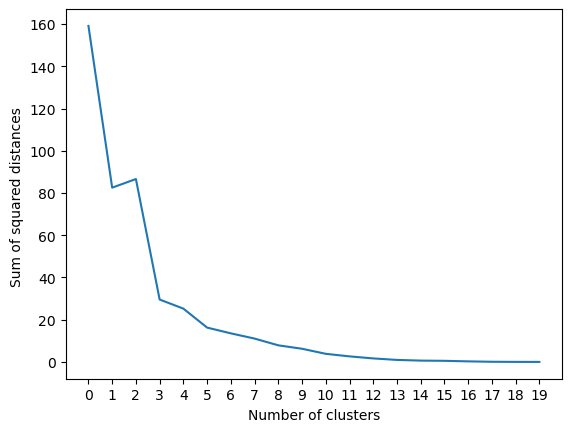

In [17]:
import pandas as pd
X, y = make_blobs(random_state=0, n_samples=20)
elbow = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    elbow.append(kmeans.inertia_)
plt.plot(elbow)
plt.xticks(list(range(0, 20)))
plt.ylabel("Sum of squared distances ")
plt.xlabel("Number of clusters")
plt.show()

The inflection point (elbow) is at two clusters, indicating that a two-cluster model best fits the data set.


Another way to find the optimal number of clusters is to calculate the **silhouette coefficient**, following Rousseeuw [5]. Let $a$ be the mean distance between a data point and all other data points in the same cluster. Let $b$ be the mean distance between a data point and all other data points in the next nearest cluster. The silhouette coefficient for the data point $i$ is defined as

\begin{equation}
s(i) = \frac{b(i) -a(i)}{max (a(i),b(i))}
\end{equation}
The silhouette score is then defined as the average silhouette coefficient of the given partition. A higher silhouette score refers to a model with better-defined clusters. If a cluster only contains one object, we set $s$ to zero.

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

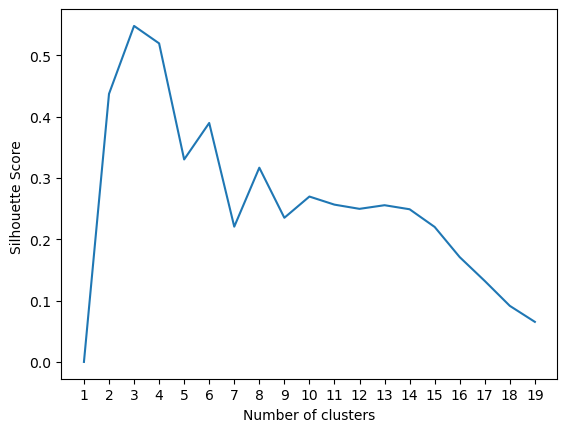

0.06531794820611332


In [18]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import datasets
import numpy as np
from sklearn.cluster import KMeans

X, y = make_blobs(random_state=0, n_samples=20)
silh_score = [0]
for i in range(2, 20):
    kmeans = KMeans(n_clusters=i).fit(X)
    labels = kmeans.labels_

    silh_score.append(metrics.silhouette_score(X, labels))

plt.plot(list(range(1, 20)), silh_score)
plt.xticks(list(range(1, 20)))
plt.ylabel("Silhouette Score ")
plt.xlabel("Number of clusters")
plt.show()
print(metrics.silhouette_score(X, labels))

We obtain the highest silhouette score with three clusters, indicating that a three-cluster model is the best fit for this data set. Comparing both methods leads to an optimal number of clusters between two and three, depending on the specific task. 

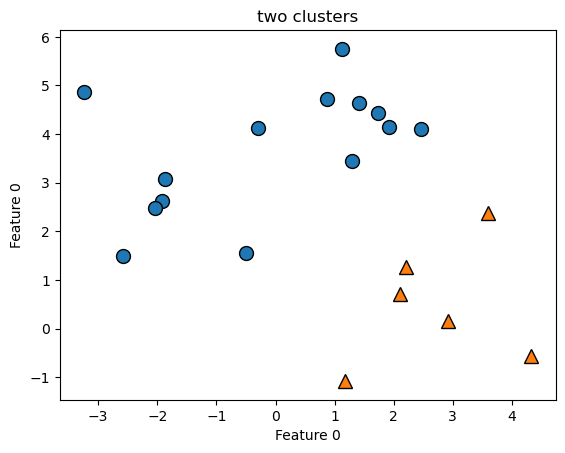

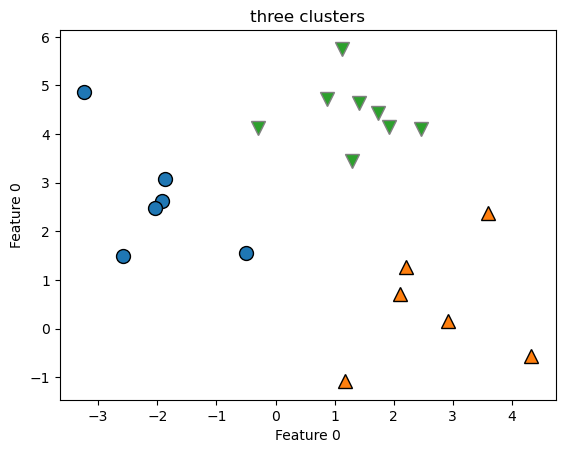

In [19]:
X, y = make_blobs(random_state=0, n_samples=20)
agg = AgglomerativeClustering(n_clusters=2, linkage="ward")
assignment = agg.fit_predict(X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignment)
plt.xlabel("Feature 0")
plt.ylabel("Feature 0")
plt.title("two clusters")
plt.show()
agg = AgglomerativeClustering(n_clusters=3, linkage="ward")
assignment = agg.fit_predict(X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignment)
plt.xlabel("Feature 0")
plt.ylabel("Feature 0")
plt.title("three clusters")
plt.show()

To practice unsupervised learning algorithms in Python, please complete the datacamp course "Cluster Analysis in Python". Or do other courses on https://www.kaggle.com/learn

## 3. Session takeaways   <a name="takeaways"></a> 
*What have we learned in this session?*

- We now understand the basic idea of clustering
- We can perform k-means and hierarchical clustering methods 
- We understand the differences of linkages and distances between objects and clusters
- We know different ways to estimate the best partition of your data
- We can use clustering tools to find structures in your data

*What's next?*

During the hands-on session you are going to implement unsupervised learning algorithms using financial data. 

## 4. Hands on  <a name="Handson"></a> 

### Exercise 1 

a) Download the DAX stock tickers from https://en.wikipedia.org/wiki/DAX and drop the ticker for Siemens Energy.

b) Download the DAX stock data from Yahoo Finance from January 1, 2018 to January 1, 2020 with the tickers and calculate the daily returns. Use the yfinance library.  



In [1]:
import pandas as pd

# Load the DAX components table from Wikipedia
url = "https://en.wikipedia.org/wiki/DAX"
tables = pd.read_html(url)
dax_table = tables[4]  # The 5th table contains the DAX listings

# Get ticker symbols
dax_tickers = dax_table["Ticker"].tolist()

# Remove Siemens Energy (ticker: ENR.DE on Yahoo Finance)
dax_tickers = [ticker for ticker in dax_tickers if ticker != "ENR.DE"]

print("DAX tickers without Siemens Energy:")
print(dax_tickers)


DAX tickers without Siemens Energy:
['ADS.DE', 'AIR.PA', 'ALV.DE', 'BAS.DE', 'BAYN.DE', 'BEI.DE', 'BMW.DE', 'BNR.DE', 'CBK.DE', 'CON.DE', '1COV.DE', 'DTG.DE', 'DBK.DE', 'DB1.DE', 'DHL.DE', 'DTE.DE', 'EOAN.DE', 'FRE.DE', 'FME.DE', 'HNR1.DE', 'HEI.DE', 'HEN3.DE', 'IFX.DE', 'MBG.DE', 'MRK.DE', 'MTX.DE', 'MUV2.DE', 'P911.DE', 'PAH3.DE', 'QIA.DE', 'RHM.DE', 'RWE.DE', 'SAP.DE', 'SRT3.DE', 'SIE.DE', 'SHL.DE', 'SY1.DE', 'VOW3.DE', 'VNA.DE', 'ZAL.DE']


In [25]:
pip install yfinance -q

Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance as yf

# Set date range
start_date = "2018-01-01"
end_date = "2020-01-01"

# Download Adjusted Close prices
data = yf.download(dax_tickers, start=start_date, end=end_date)["Close"]

# Fill missing values forward
data_filled = data.ffill()

# Calculate daily returns
daily_returns = data_filled.pct_change()

daily_returns = daily_returns.dropna(axis=1, how='all')

daily_returns = daily_returns.dropna()

print("\nSample of daily returns:")
print(daily_returns.head())


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  40 of 40 completed

2 Failed downloads:
['P911.DE', 'DTG.DE']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-01-01 -> 2020-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1514761200, endDate = 1577833200")')
C:\Users\HP\AppData\Local\Temp\ipykernel_6064\696435654.py:14: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  daily_returns = data_filled.pct_change()



Sample of daily returns:
Ticker       1COV.DE    ADS.DE    AIR.PA    ALV.DE    BAS.DE   BAYN.DE  \
Date                                                                     
2018-04-13 -0.001745  0.001427 -0.015706  0.004135  0.002025  0.001523   
2018-04-16  0.008731  0.000475  0.004222  0.000317  0.000832 -0.006792   
2018-04-17  0.030041  0.011865  0.029874  0.013933  0.013422  0.027557   
2018-04-18  0.014582  0.002345  0.016330  0.000000  0.008087 -0.003774   
2018-04-19 -0.003167 -0.014974 -0.003805  0.002811  0.000698 -0.006979   

Ticker        BEI.DE    BMW.DE    BNR.DE    CBK.DE  ...    RHM.DE    RWE.DE  \
Date                                                ...                       
2018-04-13  0.006265  0.015568  0.007098 -0.005918  ... -0.058323  0.007246   
2018-04-16 -0.005582 -0.007336 -0.002695 -0.001302  ...  0.009494 -0.004317   
2018-04-17  0.007124  0.006177  0.007691  0.012668  ...  0.006270  0.015414   
2018-04-18 -0.002572 -0.004604  0.005569 -0.017292  ...  0.0

<Axes: xlabel='Date'>

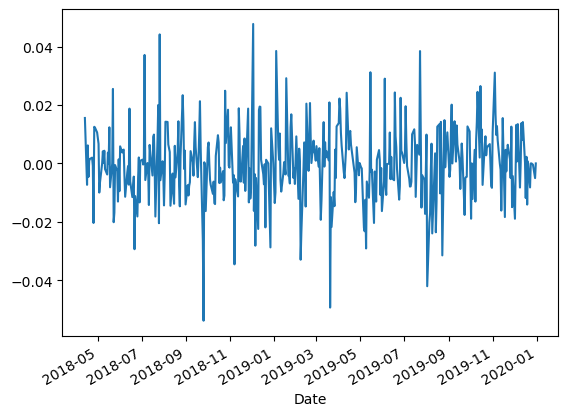

In [11]:
daily_returns["BMW.DE"].plot()

### Exercise 2

a) Perform a k-means clustering to group the DAX companies based on their stock market movements.

b) Perform a hierarchical clustering to group the DAX companies based on their stock market movements using correlation as affinity and then plot the dendrogram.

c) Optimize the number of clusters for both clustering algorithms based on the DAX data.

In [6]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Scale the data before clustering
scaler = StandardScaler()
returns_scaled = scaler.fit_transform(daily_returns.T)  # transpose: shape (tickers, time)

# Fit KMeans with a chosen number of clusters (e.g., 4)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(returns_scaled)

# Store labels
kmeans_results = pd.DataFrame({
    "Company": daily_returns.columns,
    "Cluster": kmeans_labels
})

print("K-Means Clustering Results:")
print(kmeans_results.sort_values("Cluster"))


K-Means Clustering Results:
    Company  Cluster
37   ZAL.DE        0
23   MRK.DE        0
27   QIA.DE        0
20  HNR1.DE        0
19  HEN3.DE        0
17   FRE.DE        0
16   FME.DE        0
15  EOAN.DE        0
14   DTE.DE        0
13   DHL.DE        0
24   MTX.DE        0
29   RWE.DE        0
30   SAP.DE        0
31   SHL.DE        0
8    BNR.DE        0
32   SIE.DE        0
6    BEI.DE        0
34   SY1.DE        0
35   VNA.DE        0
3    ALV.DE        0
2    AIR.PA        0
1    ADS.DE        0
11   DB1.DE        0
25  MUV2.DE        0
28   RHM.DE        1
26  PAH3.DE        1
0   1COV.DE        1
21   IFX.DE        1
36  VOW3.DE        1
12   DBK.DE        1
10   CON.DE        1
9    CBK.DE        1
7    BMW.DE        1
4    BAS.DE        1
22   MBG.DE        1
18   HEI.DE        1
5   BAYN.DE        2
33  SRT3.DE        3


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


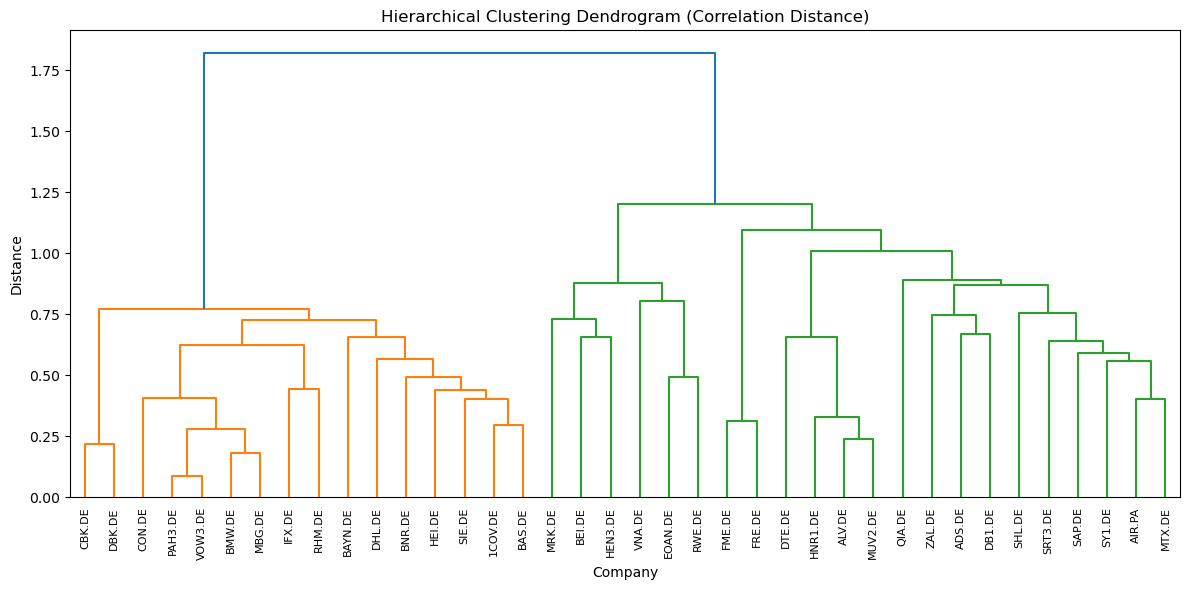

In [7]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt

# Compute correlation-based distance between companies
distance_corr = pdist(daily_returns.T, metric='correlation')

# Hierarchical clustering using Ward linkage
linkage_matrix = linkage(distance_corr, method='ward')

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, labels=daily_returns.columns, leaf_rotation=90)
plt.title('Hierarchical Clustering Dendrogram (Correlation Distance)')
plt.xlabel('Company')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

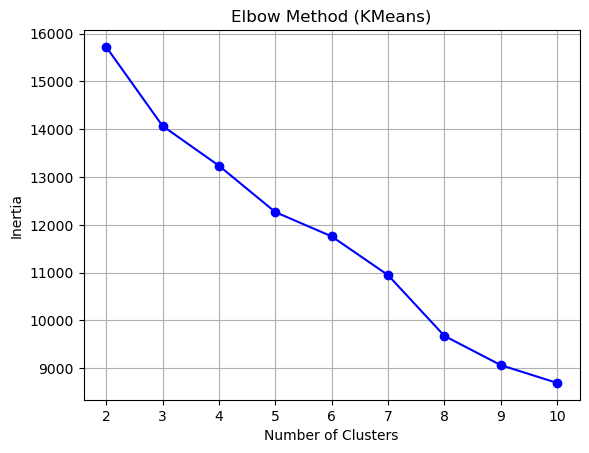

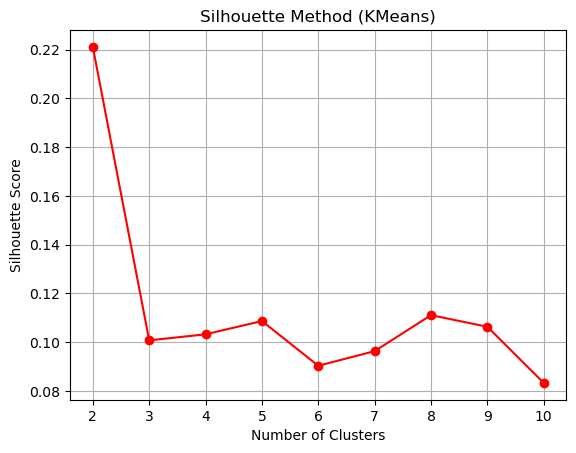

In [13]:
from sklearn.metrics import silhouette_score

inertia = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(returns_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(returns_scaled, labels))

# Plot Elbow
plt.figure()
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method (KMeans)')
plt.grid(True)
plt.show()

# Plot Silhouette Scores
plt.figure()
plt.plot(K_range, silhouette_scores, 'ro-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method (KMeans)')
plt.grid(True)
plt.show()


### References
***
[1] Müller, Andreas C., and Sarah Guido. Introduction to machine learning with Python: a guide for data scientists. " O'Reilly Media, Inc.", 2016.

[2] Fahrmeir, L., Hamerle, A., & Tutz, G. (Eds.). (2015). Multivariate statistische verfahren. Walter de Gruyter GmbH & Co KG.

[3] Hastie, T., Tibshirani, R., & Friedman, J. (2009). The elements of statistical learning: data mining, inference, and prediction. Springer Science & Business Media.

[4] Goutte, C., Toft, P., Rostrup, E., Nielsen, F. A., & Hansen, L. K. (1999). On clustering fMRI time series. NeuroImage, 9(3), 298-310.

[5] Rousseeuw, P. J. (1987). Silhouettes: a graphical aid to the interpretation and validation of cluster analysis. Journal of computational and applied mathematics, 20, 53-65.

[6] Refer to the `statsmodels` library for user guides and extensive applications: https://www.statsmodels.org/dev/examples/index.html

